In [3]:
import impact
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, QuantileTransformer
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.gaussian_process import GaussianProcessRegressor

In [1]:
path = '../data/merged/'

In [5]:
questions_unified = pd.read_pickle(path+'questions_unified.pickle')
final = pd.read_pickle(path+'final.pickle')
type_sector_score = pd.read_pickle(path+'type_sector_score.pickle')

1. MinMaxScaler+rf: 

all importance <0.1, 35 importance > 0.01


2. Normalizer+rf:

importance

all features    score: 0.99

2 importance>0.05, score: 0.99

nationalitate: 0.09

question_edges_overlap importance: 0.816,   score: 0.97

3. StandardScaler+rf:

importance

all importance <0.1, score: 0.65

question_edges_overlap, out_food, festival >0.05   score: 0.28

35 importance >0.01   score: 0.64



4. QuantileTransformer+rf

all importance <0.1  score: 0.64

question_edges_overlap, out_food, festival >0.05    score: 0.28

38 importance >0.01    score:0.64


5. 


# Scaler

In [90]:
# normalizer
nor_scaler = Normalizer().fit(final)
# # MinMaxScaler
# nor_scaler = MinMaxScaler().fit(final)
# # standardscaler
# nor_scaler = StandardScaler().fit(final)
# # quantileTransformer
# nor_scaler = QuantileTransformer().fit(final)

In [89]:
# normalizer
score_scaler = Normalizer().fit(type_sector_score)
# # MinMaxScaler
# score_scaler = MinMaxScaler().fit(type_sector_score)
# # standardscaler
# score_scaler = StandardScaler().fit(type_sector_score)
# # quantileTransformer
# score_scaler = QuantileTransformer().fit(type_sector_score)

In [117]:
# final_scaled
final_scaled = pd.DataFrame(nor_scaler.transform(final), columns = final.columns)
score_scaled = pd.DataFrame(score_scaler.transform(type_sector_score), columns = type_sector_score.columns)

# extract X, Y
Y = final_scaled['score_sum']
Y = score_scaled['shelter']
X = final_scaled.drop(columns = ['score_sum'])

# Feature Selection

## Random Forest

In [118]:
# Random Forest
rForest = RandomForestRegressor(random_state = 0)
rForest.fit(X, Y)
fi = pd.DataFrame(rForest.feature_importances_, columns = ["importance"])

In [119]:
fi.index = X.columns
fi_sort = fi.sort_values(by = 'importance', ascending= False)

In [120]:
fi_sort

importance
question_edges_overlap    0.059161
out_wash                  0.050014
out_high_inten_perc       0.045498
charre                    0.045139
administratif             0.041530
out_shelter               0.036405
leader                    0.030550
out_food                  0.030072
out_demographic           0.027905
artisant                  0.027871
chateau                   0.027709
in_shelter                0.026695
maloumdi                  0.025493
sexe                      0.025279
in_wash                   0.025141
doubai                    0.024967
out_degree                0.024157
displacement_overlap      0.021927
nationalite               0.021127
out_high_freq_perc        0.020472
out_inten_mean            0.020423
festival                  0.020173
in_demographic            0.019669
in_inten_mean             0.019552
affounori                 0.019489
statut                    0.018494
in_degree                 0.018339
nguelkolo                 0.017919
other                     0.017493
out_freq_mean             0.016421
in_freq_mean              0.015106
in_food                   0.014827
in_relia_mean             0.013211
in_high_freq_perc         0.012559
out_sante                 0.012359
adjimeri                  0.012225
in_sante                  0.011166
in_high_inten_perc        0.010965
in_very_relia_perc        0.009747
sabon_carre               0.009610
out_education             0.008306
garin_dogo                0.008305
education related         0.007631
in_education              0.007417
diffa_koura               0.007064
farmer / fisherman        0.006621
unemployed                0.003897
small business            0.001930
in_displacement           0.001065
out_displacement          0.000906

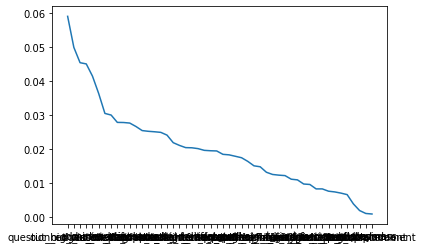

In [121]:
plt.plot(fi_sort)

In [130]:
# the threshold can be changed here
fi_select = fi[fi['importance'] > 0.02]
fi_select

importance
out_degree                0.026324
in_shelter                0.029994
in_demographic            0.022466
in_wash                   0.026704
out_food                  0.032190
out_shelter               0.039276
out_demographic           0.031483
out_wash                  0.051376
in_inten_mean             0.022255
out_inten_mean            0.020789
out_high_inten_perc       0.048609
out_high_freq_perc        0.020557
question_edges_overlap    0.062205
displacement_overlap      0.023659
affounori                 0.020738
charre                    0.045150
maloumdi                  0.025059
doubai                    0.025859
administratif             0.041882
chateau                   0.030453
festival                  0.020058
nationalite               0.022668
sexe                      0.028542
artisant                  0.030580
leader                    0.033524

In [131]:
select_index = fi_select.index
X_new = X[select_index]

In [132]:
# Feature importance detection with Random Forest Regressor
rForest = RandomForestRegressor(random_state = 0)
rForest.fit(X_new, Y)
fi = pd.DataFrame(rForest.feature_importances_, columns = ["importance"])

In [133]:
fi.index = X_new.columns
rForest.score(X_new, Y)

0.8732803343125574

In [136]:
rForest = RandomForestRegressor(random_state = 0)
rsk = RepeatedKFold(random_state = 0)
n_scores = cross_val_score(rForest, X_new, Y, scoring = "r2", cv = rsk)
np.mean(n_scores), np.std(n_scores)

(0.15279276855601678, 0.058100897631336)